In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [9]:

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = edu_df["STATE"].unique()

for state in states:
    edu_df.loc[edu_df["STATE"] == state, fill_list] = edu_df.loc[edu_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
edu_df.dropna(inplace=True)
edu_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154
215,1996_CONNECTICUT,CONNECTICUT,1996,499815.0,4686025.0,162218.0,1703171.0,2820636.0,4538234.0,2701637.0,...,41969.0,37991.0,28882.0,335296.0,137753.0,482196.0,232.026574,279.591245,231.598305,263.689781
217,1996_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1996,79802.0,678874.0,57870.0,0.0,621004.0,703245.0,334893.0,...,5442.0,4625.0,3042.0,46313.0,16241.0,67598.0,187.134670,232.831510,181.626990,264.938466
218,1996_FLORIDA,FLORIDA,1996,2175352.0,13684457.0,942159.0,6671487.0,6070811.0,13936240.0,6380643.0,...,175240.0,169657.0,105469.0,1422671.0,589050.0,2065700.0,215.763583,263.639394,207.297609,255.226635
220,1996_HAWAII,HAWAII,1996,187104.0,1199019.0,91391.0,1079097.0,28531.0,1231550.0,671105.0,...,14864.0,13786.0,10466.0,119309.0,51427.0,171430.0,214.965562,262.130082,199.701682,260.800208
224,1996_IOWA,IOWA,1996,502343.0,3258040.0,147878.0,1486426.0,1623736.0,3284185.0,1679091.0,...,34918.0,38801.0,35650.0,292987.0,154912.0,452941.0,229.126198,283.986369,223.045210,271.566770


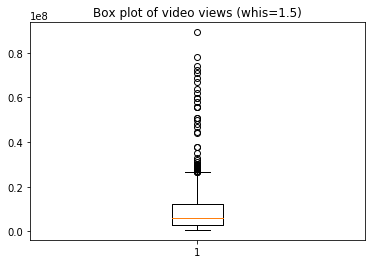

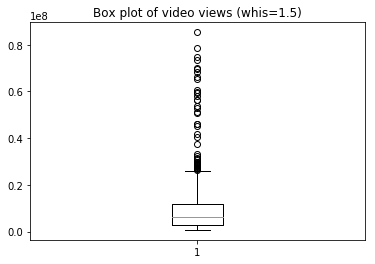

In [8]:
plt.boxplot(edu_df["TOTAL_REVENUE"])
plt.title("Box plot of video views (whis=1.5)")
plt.show()
plt.boxplot(edu_df["TOTAL_EXPENDITURE"])
plt.title("Box plot of video views (whis=1.5)")
plt.show()

Yes, these two vaiables has outliers


In [14]:
#2.
from scipy.stats.mstats import winsorize
winsorized_rev = winsorize(edu_df["TOTAL_REVENUE"], (0, 0.10))
winsorized_exp = winsorize(edu_df["TOTAL_EXPENDITURE"], (0, 0.10))

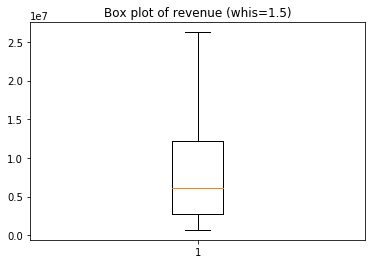

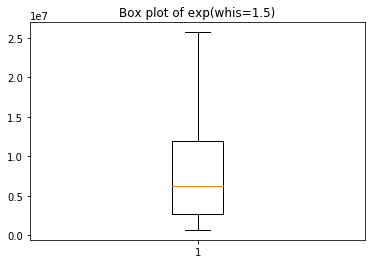

In [15]:
plt.boxplot(winsorized_rev)
plt.title("Box plot of revenue (whis=1.5)")
plt.show()
plt.boxplot(winsorized_exp)
plt.title("Box plot of exp(whis=1.5)")
plt.show()

In [17]:
#3
profit = edu_df["TOTAL_EXPENDITURE"] - edu_df["TOTAL_REVENUE"]
profit

209      207170.0
211      248251.0
212      113997.0
213      278711.0
214      183962.0
215     -147791.0
217       24371.0
218      251783.0
220       32531.0
224       26145.0
226      203647.0
227      -64258.0
228      -20045.0
229      136688.0
230      349819.0
235      -20364.0
240     -108002.0
242         711.0
251      161163.0
252      160428.0
255      228865.0
256      223795.0
258      178435.0
372      -51621.5
416      117350.0
418      -81974.0
419     -161455.0
420     -798454.0
422     -278798.0
424      -22616.0
          ...    
1462      52935.0
1463      65273.0
1464      40353.0
1465    -148476.0
1466    -139288.0
1467    -417130.0
1468    -446824.0
1469   -1414616.0
1470     662811.0
1471    -124043.0
1472    -173349.0
1473      78880.0
1474     241611.0
1475    -108637.0
1476     -25695.0
1477    -347190.0
1478     -35672.0
1479    1369365.0
1480     759344.0
1481     174881.0
1482    -414013.0
1483     106607.0
1484     673762.0
1485    -167122.0
1486     -

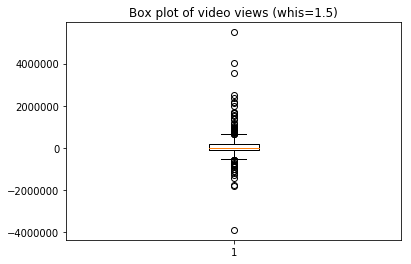

In [21]:
plt.boxplot(profit)
plt.title("Box plot of video views (whis=1.5)")
plt.show()

In [22]:
winsorized_pr = winsorize(profit, (0.05, 0.05))

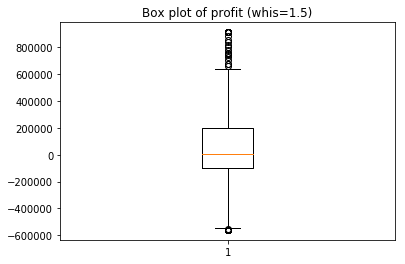

In [24]:
plt.boxplot(winsorized_pr)
plt.title("Box plot of profit (whis=1.5)")
plt.show()

In [ ]:

pr2 = winsorized_revenue - winsorized_expenditure
plt.title("Box plot of budget deficit 2")

In [ ]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorized_budget,
              "winsorized_budget2": winsorized_budget2}).describe()